Kaggle Titanic Data Set

Done to test a few things and explore pandas and sklearn. Not a serious submission. Many potential ways to improve it and better submissions can be read on the kaggle website.

In [2]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt

train_data_raw = pd.read_csv('train.csv')
test_data_raw = pd.read_csv('test.csv')

Preprocessing the training and testing data

In [3]:
#PassengerId	Pclass	Name	Sex	Age	SibSp	Parch	Ticket	Fare	Cabin	Embarked_C	Embarked_Q	Embarked_S
drop_labels = ['PassengerId','Name','Ticket','Cabin']
train_2 = train_data_raw.drop(drop_labels,axis=1)

train_3 = train_2[pd.isnull(train_2['Age']) == False] #remove NaN, for the test data using an imputer

train_3_label = train_3['Survived']
train_3 = train_3.drop(['Survived'],axis=1)

train_3['Sex'] = train_3['Sex'].map({'male':0,'female':1}).astype(int)
train_3 = pd.get_dummies(train_3, columns = ['Embarked'])

#want to scale and normalize:
#age, sibsq, parch, fare
from sklearn import preprocessing

min_max_labels = ['Pclass','Age','SibSp','Parch','Fare']
min_max_scaler = preprocessing.MinMaxScaler() #normalizing instead of using a standardizer which would probably be better
train_3[min_max_labels] = min_max_scaler.fit_transform(train_3[min_max_labels])
print(train_3.head())

from sklearn.preprocessing import Imputer

imp = Imputer(missing_values='NaN', strategy='mean', axis=0) #replace NaN with means

test_4 = test_data_raw.drop(drop_labels,axis=1)
test_4 = pd.get_dummies(test_4, columns = ['Embarked'])
test_4['Sex'] = test_4['Sex'].map({'male':0,'female':1}).astype(int)
test_4['Fare'] = imp.fit_transform(test_4['Fare'].values.reshape(-1,1))
test_4['Age'] = imp.fit_transform(test_4['Age'].values.reshape(-1,1))
test_4[min_max_labels] = min_max_scaler.transform(test_4[min_max_labels]) #...


   Pclass  Sex       Age  SibSp  Parch      Fare  Embarked_C  Embarked_Q  \
0     1.0    0  0.271174    0.2    0.0  0.014151           0           0   
1     0.0    1  0.472229    0.2    0.0  0.139136           1           0   
2     1.0    1  0.321438    0.0    0.0  0.015469           0           0   
3     0.0    1  0.434531    0.2    0.0  0.103644           0           0   
4     1.0    0  0.434531    0.0    0.0  0.015713           0           0   

   Embarked_S  
0           1  
1           0  
2           1  
3           1  
4           1  


Some data exploration follows. Scatter plots, correlation plots, histograms etc.

In [4]:
#Data Exploration items

#five figure summary
#train_input.describe()

#correlation between variables
#print (train_input.corr()) 

#scatter plot of variables vs. other variables
#pd.scatter_matrix(train_input, alpha = 0.3, diagonal = 'kde'); 
#pd.scatter_matrix(train_input, alpha = 0.3, figsize = (14,8), diagonal = 'kde'); 

#plt.figure();
#train_input['Fare'].plot(kind='hist') #can change kind to bar, etc for different types of plots
#plt.show() #needed to show various plots

#ways to examine the table counts
#for c in train_input.columns.values.tolist():
#    print(c)
#    print(train_input[c].value_counts())
#[train_input[c].value_counts() for c in list(train_input.select_dtypes(include=['O']).columns)]
#[train_input[c].value_counts() for c in list(train_input.columns)]

#class and fare seem to be correlated
#fare, sibsq, and parch could maybe be transformed

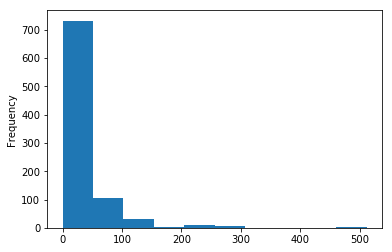

In [24]:

#In [12]: df.ix[5].plot(kind='bar'); plt.axhline(0, color='k')

In [4]:
#for c in train_input.columns.values.tolist():
    #if c == 'Pclass'
    #print(c)
    #print(train_input[c].value_counts())
print(train_2['Pclass'].value_counts())
print(train_2[train_2['Pclass'] == 1]['Fare'].describe())
print(train_2[train_2['Pclass'] == 2]['Fare'].describe())
print(train_2[train_2['Pclass'] == 3]['Fare'].describe())

3    491
1    216
2    184
Name: Pclass, dtype: int64
count    216.000000
mean      84.154687
std       78.380373
min        0.000000
25%       30.923950
50%       60.287500
75%       93.500000
max      512.329200
Name: Fare, dtype: float64
count    184.000000
mean      20.662183
std       13.417399
min        0.000000
25%       13.000000
50%       14.250000
75%       26.000000
max       73.500000
Name: Fare, dtype: float64
count    491.000000
mean      13.675550
std       11.778142
min        0.000000
25%        7.750000
50%        8.050000
75%       15.500000
max       69.550000
Name: Fare, dtype: float64


In [38]:
#for c in train_2.columns.values.tolist():
#    print(c)
#    print(len( train_2[c][pd.isnull(train_2[c])] ) )
#train_3 = train_2[pd.isnull(train_2['Age']) == False]
#train_3.head()
#print(len(train_3))
#print(train_3['Pclass'].value_counts())

Dimension 1    0.3947
Dimension 2    0.6538
Dimension 3    0.8392
Dimension 4    0.9003
Dimension 5    0.9505
Dimension 6    0.9752
Dimension 7    0.9919
Name: Explained Variance, dtype: float64
             Explained Variance  Pclass     Sex     Age   SibSp   Parch  \
Dimension 1              0.3947 -0.3704  0.3441  0.0349 -0.0054  0.0136   
Dimension 2              0.2591  0.0991 -0.9023  0.0363 -0.0550 -0.0799   
Dimension 3              0.1854  0.8782  0.2226 -0.2100  0.0665  0.0438   
Dimension 4              0.0611 -0.1203 -0.0119  0.1414 -0.0115 -0.0455   
Dimension 5              0.0502 -0.1485 -0.1204 -0.4506  0.7815  0.3552   
Dimension 6              0.0247  0.1642  0.0125  0.8506  0.3940  0.2929   
Dimension 7              0.0167 -0.0019 -0.0557 -0.0760 -0.4739  0.8625   

               Fare  Embarked_C  Embarked_Q  Embarked_S  
Dimension 1  0.0782      0.5833      0.0384     -0.6286  
Dimension 2 -0.0211      0.2729      0.0316     -0.2991  
Dimension 3 -0.0968      0.139

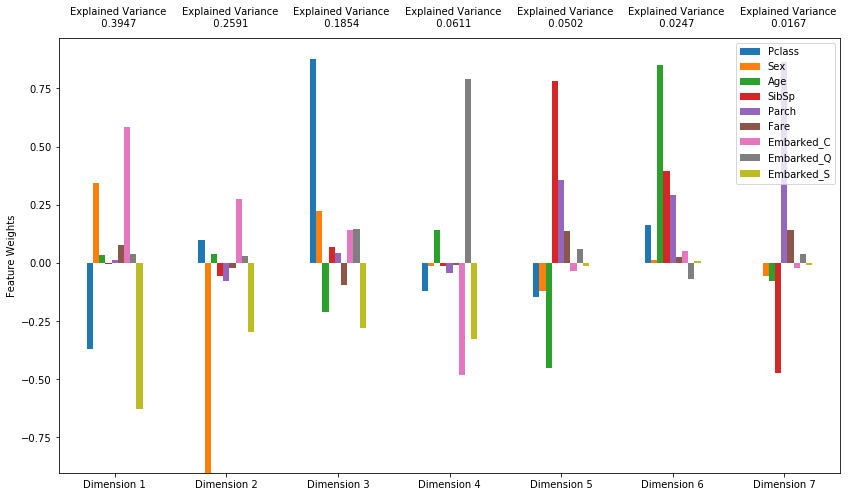

In [21]:
#Appying PCA and t-sne. not used in analysis but simply to test out some things available in sklearn
import visuals as vs #visualization library
from sklearn.decomposition import PCA

pca = PCA(n_components = 7,random_state=0)#PCA(n_components = 9,random_state=None)
pca.fit(train_3)

# Generate PCA results plot
pca_results = vs.pca_results(train_3, pca)

print(pca_results['Explained Variance'].cumsum())
print(pca_results)

In [22]:
from sklearn.manifold import TSNE

t_sne_model = TSNE(n_components=2, random_state=0)
t_sne_test = t_sne_model.fit_transform(train_3) 

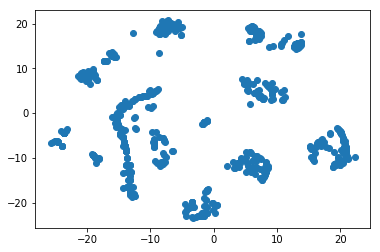

In [23]:
plt.scatter(t_sne_test[:,0],t_sne_test[:,1])

In [24]:
#outlier tests
from IPython.display import display 

# For each feature find the data points with extreme high or low values
for feature in train_3.keys():
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(train_3[feature], 25)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(train_3[feature], 75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = (Q3-Q1)*3.5 #1.5
    
    # Display the outliers
    print ("Data points considered outliers for the feature '{}':".format(feature))
    display(train_3[~((train_3[feature] >= Q1 - step) & (train_3[feature] <= Q3 + step))])

Data points considered outliers for the feature 'Pclass':


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S


Data points considered outliers for the feature 'Sex':


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S


Data points considered outliers for the feature 'Age':


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S


Data points considered outliers for the feature 'SibSp':


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
59,1.0,0,0.132948,1.0,0.333333,0.091543,0,0,1
71,1.0,1,0.195778,1.0,0.333333,0.091543,0,0,1
386,1.0,0,0.007288,1.0,0.333333,0.091543,0,0,1
480,1.0,0,0.107816,1.0,0.333333,0.091543,0,0,1
683,1.0,0,0.170646,1.0,0.333333,0.091543,0,0,1


Data points considered outliers for the feature 'Parch':


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
13,1.0,0,0.484795,0.2,0.833333,0.061045,0,0,1
25,1.0,1,0.472229,0.2,0.833333,0.061264,0,0,1
610,1.0,1,0.484795,0.2,0.833333,0.061045,0,0,1
638,1.0,1,0.509927,0.0,0.833333,0.077465,0,0,1
678,1.0,1,0.535059,0.2,1.000000,0.091543,0,0,1
885,1.0,1,0.484795,0.0,0.833333,0.056848,0,1,0


Data points considered outliers for the feature 'Fare':


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
27,0.0,0,0.233476,0.6,0.333333,0.513342,0,0,1
88,0.0,1,0.283740,0.6,0.333333,0.513342,0,0,1
118,0.0,0,0.296306,0.0,0.166667,0.483128,1,0,0
195,0.0,1,0.723549,0.0,0.000000,0.285990,1,0,0
258,0.0,1,0.434531,0.0,0.000000,1.000000,1,0,0
268,0.0,1,0.723549,0.0,0.166667,0.299539,0,0,1
269,0.0,1,0.434531,0.0,0.000000,0.264739,0,0,1
297,0.0,1,0.019854,0.2,0.333333,0.295806,0,0,1
299,0.0,1,0.623021,0.0,0.166667,0.483128,1,0,0
305,0.0,0,0.006283,0.2,0.333333,0.295806,0,0,1


Data points considered outliers for the feature 'Embarked_C':


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
1,0.0,1,0.472229,0.2,0.000000,0.139136,1,0,0
9,0.5,1,0.170646,0.2,0.000000,0.058694,1,0,0
30,0.0,0,0.497361,0.0,0.000000,0.054107,1,0,0
34,0.0,0,0.346569,0.2,0.000000,0.160387,1,0,0
39,1.0,1,0.170646,0.2,0.000000,0.021942,1,0,0
43,0.5,1,0.032420,0.2,0.333333,0.081157,1,0,0
52,0.0,1,0.610455,0.2,0.000000,0.149765,1,0,0
54,0.0,0,0.811510,0.0,0.166667,0.120975,1,0,0
57,1.0,0,0.352852,0.0,0.000000,0.014110,1,0,0
60,1.0,0,0.271174,0.0,0.000000,0.014110,1,0,0


Data points considered outliers for the feature 'Embarked_Q':


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
16,1.0,0,0.019854,0.8,0.166667,0.056848,0,1,0
22,1.0,1,0.183212,0.0,0.000000,0.015672,0,1,0
44,1.0,1,0.233476,0.0,0.000000,0.015379,0,1,0
116,1.0,0,0.880623,0.0,0.000000,0.015127,0,1,0
143,1.0,0,0.233476,0.0,0.000000,0.013175,0,1,0
156,1.0,1,0.195778,0.0,0.000000,0.015094,0,1,0
171,1.0,0,0.044986,0.8,0.166667,0.056848,0,1,0
188,1.0,0,0.497361,0.2,0.166667,0.030254,0,1,0
208,1.0,1,0.195778,0.0,0.000000,0.015127,0,1,0
245,0.0,0,0.547625,0.4,0.000000,0.175668,0,1,0


Data points considered outliers for the feature 'Embarked_S':


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
1,0.0,1,0.472229,0.2,0.000000,0.139136,1,0,0
9,0.5,1,0.170646,0.2,0.000000,0.058694,1,0,0
16,1.0,0,0.019854,0.8,0.166667,0.056848,0,1,0
22,1.0,1,0.183212,0.0,0.000000,0.015672,0,1,0
30,0.0,0,0.497361,0.0,0.000000,0.054107,1,0,0
34,0.0,0,0.346569,0.2,0.000000,0.160387,1,0,0
39,1.0,1,0.170646,0.2,0.000000,0.021942,1,0,0
43,0.5,1,0.032420,0.2,0.333333,0.081157,1,0,0
44,1.0,1,0.233476,0.0,0.000000,0.015379,0,1,0
52,0.0,1,0.610455,0.2,0.000000,0.149765,1,0,0


In [27]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(train_3, train_3_label, test_size = 0.2, random_state = 0)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print( "Testing set has {} samples.".format(X_test.shape[0]))

Training set has 571 samples.
Testing set has 143 samples.


In [32]:
from sklearn.metrics import fbeta_score, accuracy_score
from time import time

def train_predict(learner, sample_size, X_train, y_train, X_test, y_test): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
    '''
    
    results = {}
    
    # TODO: Fit the learner to the training data using slicing with 'sample_size'
    start = time() # Get start time
    learner = learner.fit(X_train[:sample_size],y_train[:sample_size])
    end = time() # Get end time
    
    # TODO: Calculate the training time
    results['train_time'] = start - end
        
    # TODO: Get the predictions on the test set,
    #       then get predictions on the first 300 training samples
    start = time() # Get start time
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train[:300])
    end = time() # Get end time
    
    # TODO: Calculate the total prediction time
    results['pred_time'] = start - end
            
    # TODO: Compute accuracy on the first 300 training samples
    results['acc_train'] = accuracy_score(y_train[:300],predictions_train)
        
    # TODO: Compute accuracy on test set
    results['acc_test'] = accuracy_score(y_test,predictions_test)
    
    # TODO: Compute F-score on the the first 300 training samples
    results['f_train'] = fbeta_score(y_train[:300],predictions_train,.5)
        
    # TODO: Compute F-score on the test set
    results['f_test'] = fbeta_score(y_test,predictions_test,.5)
       
    # Success
    print ("{} trained on {} samples.".format(learner.__class__.__name__, sample_size))
        
    # Return the results
    return results

In [46]:
'''
Models to try:
//decision trees
//logistic regression (kernel version not supported in sklearn, need a work around)
//SVM
//naive gaussian bayes
//random forest
//Stochastic Gradient Descent Classifier (SGDC)
//KNN
//Ensemble Methods (Bagging, AdaBoost, Random Forest, Gradient Boosting)
//maybe a simple, feedforward NN with tensorflow
'''

from sklearn import naive_bayes, ensemble, svm, linear_model, neighbors, tree

#initialize the models
clf_A = naive_bayes.GaussianNB()
clf_B = ensemble.RandomForestClassifier(random_state=0)
clf_C = svm.SVC(random_state=0)
clf_D = linear_model.LogisticRegression(random_state=0)
clf_E = linear_model.SGDClassifier(random_state=0)
clf_F = neighbors.KNeighborsClassifier()
clf_G = tree.DecisionTreeClassifier()
clf_H = ensemble.GradientBoostingClassifier(random_state=0)

#number of samples
#samples_1 = len(y_train)/100
#samples_10 = len(y_train)/10
samples_100 = len(y_train)

# Collect results on the learners
results = {}
for clf in [clf_A, clf_B, clf_C, clf_E, clf_F, clf_G, clf_H]: #[clf_A, clf_B, clf_C, clf_E, clf_F, clf_G, clf_H]  [clf_A, clf_B, clf_C]
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_100]): #[samples_10, samples_100]
        results[clf_name][i] = \
        train_predict(clf, samples, X_train, y_train, X_test, y_test)
        
# Run metrics visualization for the three supervised learning models chosen
#vs3.evaluate(results, 0.5, 0.3) #vs3.evaluate(results, accuracy, fscore)
#print( results )
for x in results:
    print(x)
    print(results[x])

GaussianNB trained on 571 samples.
RandomForestClassifier trained on 571 samples.
SVC trained on 571 samples.
SGDClassifier trained on 571 samples.
KNeighborsClassifier trained on 571 samples.
DecisionTreeClassifier trained on 571 samples.
GradientBoostingClassifier trained on 571 samples.
SVC
{0: {'f_train': 0.7130281690140845, 'acc_train': 0.76666666666666672, 'f_test': 0.78767123287671248, 'pred_time': -0.004000186920166016, 'acc_test': 0.79720279720279719, 'train_time': -0.008000612258911133}}
DecisionTreeClassifier
{0: {'f_train': 0.9983221476510068, 'acc_train': 0.9966666666666667, 'f_test': 0.72289156626506024, 'pred_time': 0.0, 'acc_test': 0.75524475524475521, 'train_time': -0.002000093460083008}}
GaussianNB
{0: {'f_train': 0.70564516129032262, 'acc_train': 0.7533333333333333, 'f_test': 0.75, 'pred_time': -0.0009999275207519531, 'acc_test': 0.77622377622377625, 'train_time': -0.0010001659393310547}}
GradientBoostingClassifier
{0: {'f_train': 0.927734375, 'acc_train': 0.90666666

Applying GridSearch and RandomSearch to for two of the models

In [53]:
from sklearn import model_selection, metrics, ensemble

#Initialize the classifier
clf = ensemble.RandomForestClassifier(random_state=0)

#Create the parameters list you wish to tune
parameters = {'n_estimators': [1,3,5,6,7,8,9,10,15,20], 'criterion':['gini','entropy'] }

#Make an fbeta_score scoring object
scorer = metrics.make_scorer(accuracy_score)#metrics.make_scorer(fbeta_score, beta=.5)

#Perform grid search on the classifier using 'scorer' as the scoring method
grid_obj = model_selection.GridSearchCV(clf, param_grid=parameters,scoring=scorer)

#Fit the grid search object to the training data and find the optimal parameters
grid_fit = grid_obj.fit(X_train,y_train)

# Get the estimator
best_clf = grid_fit.best_estimator_

#Make predictions using the unoptimized and model
predictions = (clf.fit(X_train, y_train)).predict(X_test)
best_predictions = best_clf.predict(X_test)

# Report the before-and-afterscores
print ("Unoptimized model\n------")
print ("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions)))
print ("F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 0.5)))
print ("\nOptimized Model\n------")
print ("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print ("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))
print(best_clf)

Unoptimized model
------
Accuracy score on testing data: 0.7832
F-score on testing data: 0.7667

Optimized Model
------
Final accuracy score on the testing data: 0.7902
Final F-score on the testing data: 0.7857
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=6, n_jobs=1, oob_score=False, random_state=0,
            verbose=0, warm_start=False)


In [59]:
clf = neighbors.KNeighborsClassifier()

rs_neighbors = [1,2,3,4,5,7,9,11,13,16,20,25]
rs_weights = ['uniform','distance']
rs_iter = len(rs_neighbors)*len(rs_weights)
parameters = {'n_neighbors':rs_neighbors,'weights':rs_weights}

scorer = metrics.make_scorer(accuracy_score)

grid_obj = model_selection.RandomizedSearchCV(clf,param_distributions = parameters, n_iter = rs_iter) 

grid_fit = grid_obj.fit(X_train,y_train)

best_clf = grid_fit.best_estimator_

#Make predictions using the unoptimized and model
predictions = (clf.fit(X_train, y_train)).predict(X_test)
best_predictions = best_clf.predict(X_test)

# Report the before-and-afterscores
print ("Unoptimized model\n------")
print ("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions)))
print ("F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 0.5)))
print ("\nOptimized Model\n------")
print ("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print ("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))
print(best_clf)

Unoptimized model
------
Accuracy score on testing data: 0.7832
F-score on testing data: 0.7746

Optimized Model
------
Final accuracy score on the testing data: 0.8112
Final F-score on the testing data: 0.8209
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=9, p=2,
           weights='uniform')


Apply model to test data, for unknowns in test data with NaN predict 0

In [63]:
test_predictions = best_clf.predict(test_3)
print(test_predictions)
print(test_data_raw.head())
print(test_3.head())

[0 0 0 0 0 0 1 0 1 0 0 1 0 1 1 0 0 0 1 0 0 1 1 0 1 0 0 0 0 1 1 0 0 0 0 0 1
 1 0 0 1 1 0 0 1 1 0 0 0 1 0 0 0 1 0 1 0 0 1 1 0 0 0 1 0 1 0 1 0 0 0 1 1 1
 0 1 0 0 1 0 1 0 1 0 0 1 0 0 0 0 1 1 1 0 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 1 1 0
 1 0 0 0 0 0 1 0 0 1 0 1 0 1 0 1 0 1 0 0 0 1 0 0 0 1 1 0 1 0 1 0 0 0 0 1 0
 1 0 0 0 1 1 1 1 0 0 1 0 1 1 0 0 0 0 0 1 0 0 0 1 1 0 0 0 1 1 0 0 0 0 0 1 1
 1 0 0 1 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0
 1 0 1 0 0 0 0 0 0 0 1 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 1 0 1 0 1 0 0 1 0 0 1
 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 1 0 0 0 1 1 0 1 0]
   PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3       

Output data in format acceptable for Kaggles submission

In [109]:
test_predictions = best_clf.predict(test_4)
df_out = pd.DataFrame( {'PassengerId':pd.Series(test_data_raw['PassengerId']),'Survived':pd.Series(test_predictions)})
df_out.to_csv('titanic_submission.csv',index=False)